<a href="https://colab.research.google.com/github/DinelyWellehewage/Radar-Assignment-1/blob/main/radar_assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Radar and Navigation -Assignment 1


W. H. D. Shanuka -160583T


# Import Libraries

In [13]:
import pandas as pd
import seaborn as sbn
from google.colab import drive
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np 
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
import csv
import requests
import seaborn as sns

# Load CSV files


In [4]:
# importing module 
import csv
samples=[]
# opening the file using "with" 
# statement 
with open('raw_data1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        samples.append(float(row[0]))
print(samples)

[0.27487517124106364, 0.8688041235522252, 0.8077291728342105, 0.21103608963479847, 1.7394879595609734, -1.5581880329009654, 0.1839801870903324, 0.24907801863966186, -0.8590584471058333, -0.4833798020207924, -2.589833197665645, -2.1240917581552976, 2.2389169472889376, 0.021972236367122058, -0.09357056647408862, 1.3875953972765647, -0.1983216091185881, -0.5506327929716975, 1.8962141705615334, 0.4859380743538489, 0.1924012338816974, -2.0491148191325843, -0.11853203249231568, -1.184578097441447, -0.9690372260417276, 0.32403521872943947, -0.10539012700300264, -0.5543375359614479, -1.7068042540332569, 0.3650663618465138, -0.8026635463053579, 1.1160915298445373, -0.563341854577534, -1.0230555002611494, 0.2791250628453738, 1.3484101454682995, -0.9866545576251373, -0.8254225716898206, 0.2795374816154807, 1.0637040953088066, -0.09385891934644829, 0.07834231023419236, 1.7988504943920227, 1.847204570316022, -0.26513968060411414, -0.8083967175595702, -0.610477077693259, -1.3880229485399804, 0.12990

Text(0.5, 1.0, 'signal')

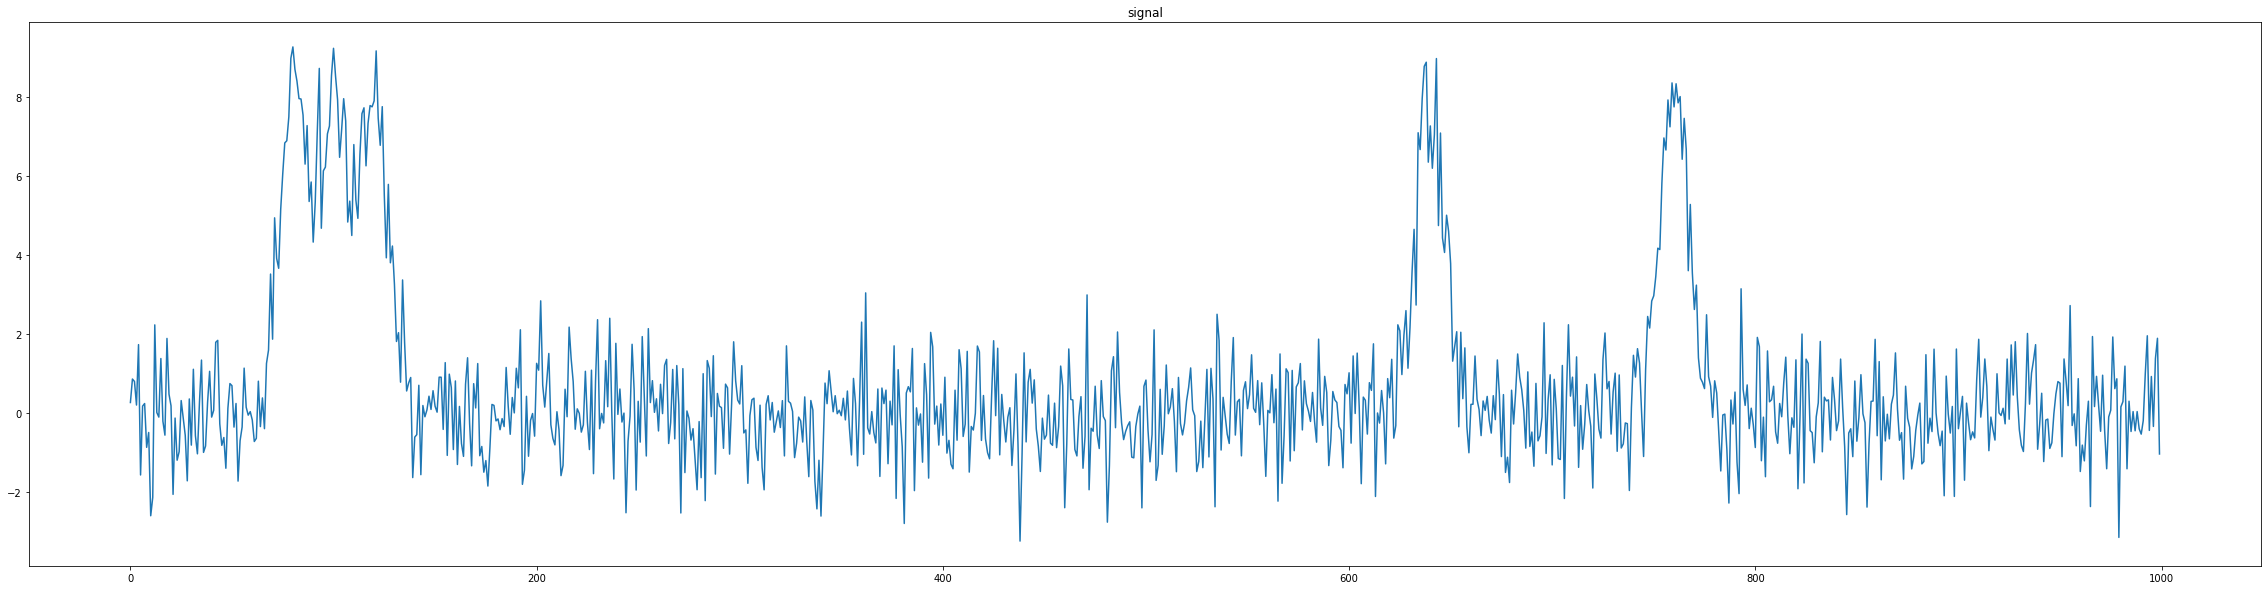

In [6]:

r1= None
r2= 1000

plt.figure(figsize=(40,10))
plt.plot(samples[r1:r2])
plt.title("signal")


# Parameters

Pulse Repetition Frequency = 1800Hz

Number of range slots =30 

Number of Revs per minute = 12

Sampling frequency = 1080000Hz

Number of samples = 18000 

σn = 1

Horizontal Beam Width = 2

In [10]:
Pulse_f = 1800         #Pulse Repitition Frequency
Beam_w = 2             #Horizontal Beam Width
No_Revs_permin = 12           #Number of Revs per minute
Sigma_n = 1          
Samp_rate = 1080000          #Sampling rate
No_bins = 30               #No of bins
No_samples = 18000         #No of samples
k=1.3



# Downsampling 

pulse cycles = (samples / sampling rate) * pulse repitition frequency

            = (18000/ 1080000)*1800
            = 30

no of samples per bin = (samples / (no of bins * pulse cycles))

                      = (18000/(30*30))
                      =20

Text(0.5, 1.0, 'Downsampled signal')

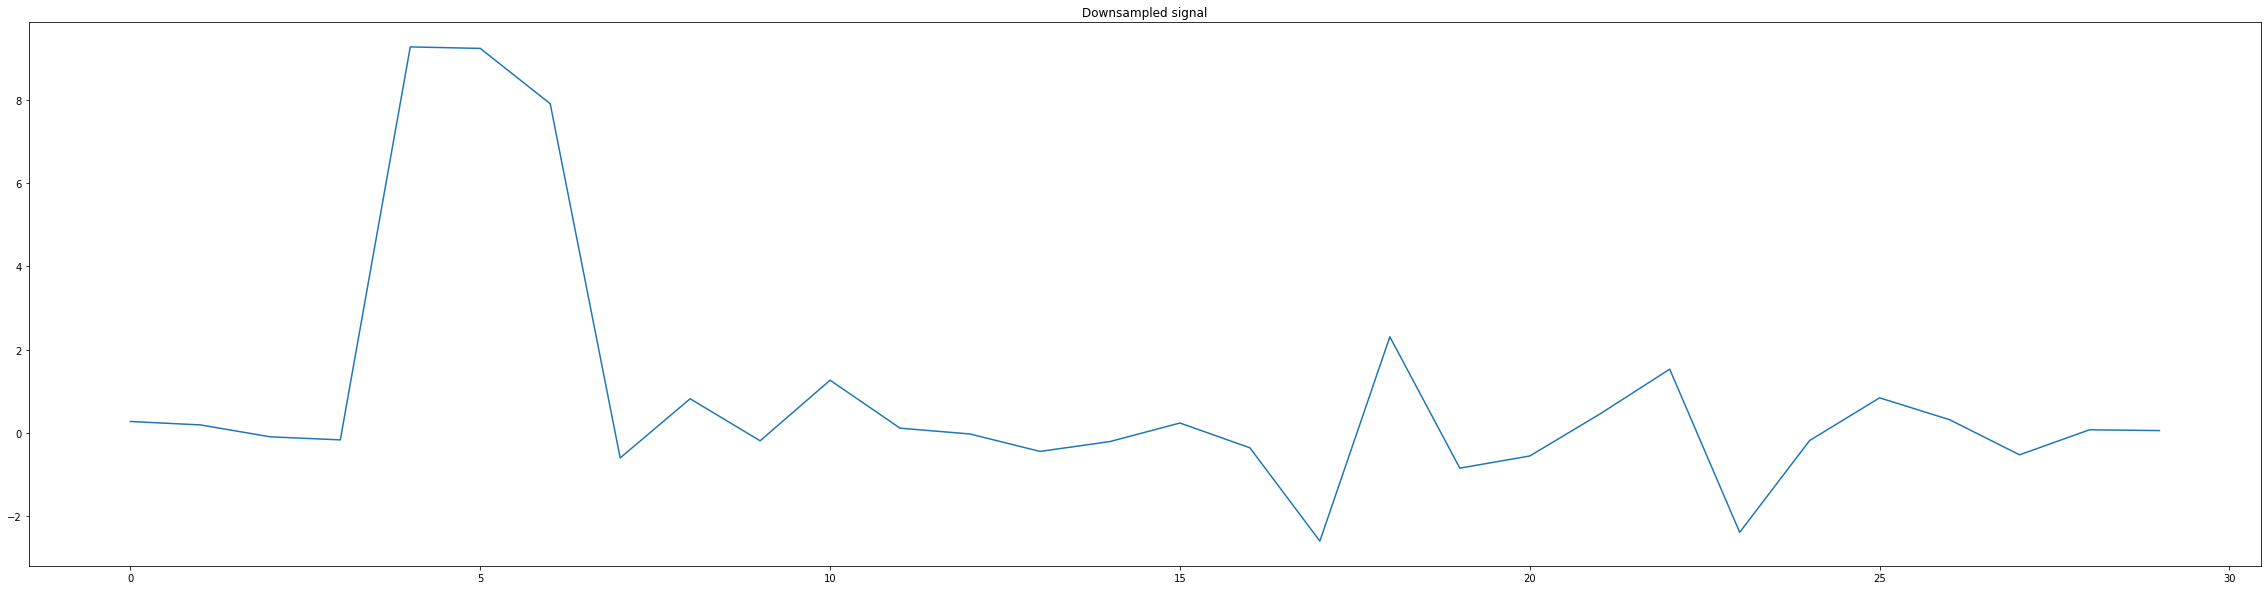

In [23]:
'''
pulse cycles = (samples / sampling rate) * pulse repitition frequency
'''
Pulse_cycles = int( (No_samples / Samp_rate )* Pulse_f)

'''
no of samples per bin = (samples / (no of bins * pulse cycles))
'''
No_samps_perbin = int (No_samples/ (No_bins * Pulse_cycles))

Samp_matrix = np.reshape(samples,newshape=[Pulse_cycles*No_bins,No_samps_perbin]) 

Downsamp_matrix = Samp_matrix[:,0]



r1= None
r2= 30

plt.figure(figsize=(40,10))
plt.plot(Downsamp_matrix[r1:r2])
plt.title("Downsampled signal")


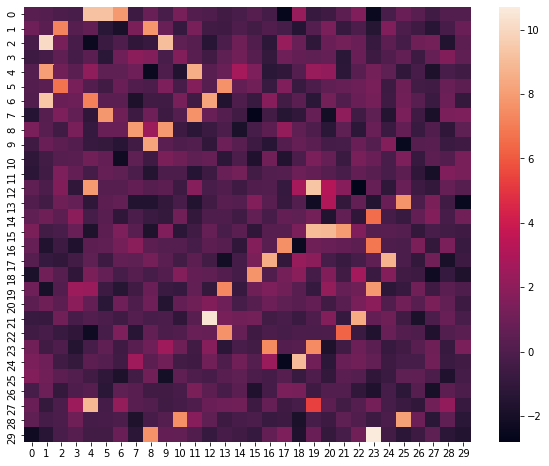

In [22]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(Downsamp_matrix.reshape(30,30) )

# Noise Threshold

### Noise Averaging


Calculate noise average to implement threshold detecting 

So that 21 sample window is chosen. Then,

Number of samples in past video = 6

Number of samples in future video = 6

Guard band = 4

Noise Avarage can be calculated from below equation.

>$(V_n)_{avg} = \frac{\sum_{i=5}^{10} (past video) + \sum_{i=5}^{10} (future video)}{12}$

Threshold value : $V_{TH}=(V_n)_{avg}+k\cdot \sigma_n $



In [ ]:
def avg_noise(Samp_matrix):
  past = Samp_matrix[:899,10:16]
  future_samps = Samp_matrix[:,5:11]
  past_s